In [62]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [63]:
url = 'https://www.imdb.com/chart/top/'

In [64]:
html = requests.get(url)

In [65]:
soup = BeautifulSoup(html.text, 'html.parser')

In [66]:
movies = soup.find('tbody', class_= 'lister-list').find_all('tr',)

In [67]:
df = []
for movie in movies:
    name = movie.find('td', class_="titleColumn").a.text
    rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
    year = movie.find('td', class_="titleColumn").span.text.strip('()')
    rating = movie.find('td',class_="ratingColumn imdbRating").strong.text
    df.append([rank, name, year, rating])

In [68]:
df1 = []
for movie in movies:
    rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
    rating = movie.find('td',class_="ratingColumn imdbRating").strong.text
    df1.append([rank, rating])

In [69]:
df2 = []
for movie in movies:
    rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
    df2.append([rank])

In [70]:
df3 = []
for movie in movies:
    rating = movie.find('td',class_="ratingColumn imdbRating").strong.text
    df3.append([rating])

In [71]:
df4 = []
for movie in movies:
    rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
    rating = movie.find('td',class_="ratingColumn imdbRating").strong.text
    rating1 = float(rating)
    rating2 = int(rating1)
    df4.append([rank, rating1])

In [72]:
df5 = pd.DataFrame(df4, columns = ['rank', 'rating'])

In [73]:
df5

,rank,rating
0,1,9.2
1,2,9.2
2,3,9.0
3,4,9.0
4,5,9.0
...,...,...
245,246,8.0
246,247,8.0
247,248,8.0
248,249,8.0


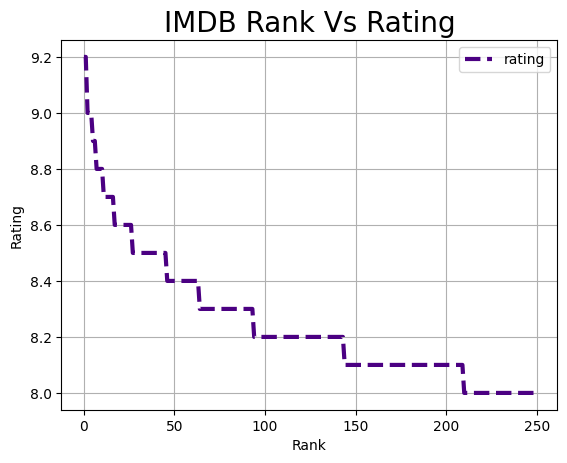

In [74]:

df5.plot(color='Indigo', linestyle='--', linewidth=3)
plt.title('IMDB Rank Vs Rating', fontsize = 20)
plt.xlabel('Rank', fontsize = 10)
plt.ylabel('Rating',fontsize = 10)
plt.grid()
plt.show()

In [75]:
df6 = []
for movie in movies:
    director = movie.find('td', class_="titleColumn").a
    del director['href']
    director1 = str(director).split(',')[0]
    director2 = str(director1).split('"')[1]
    director3 = str(director2).split(' ')[0]
    director4 = str(director2).split(' ')[1]
    director5 = director3 + ' ' + director4
    df6.append([director5])

In [76]:
df7 = []
for i in df6:
    if i not in df7:
        df7.append(i)
#print(df7)
    

In [77]:
df8 = []
for i in df7:
    print(i)
    print(df6.count(i))
    df8.append(df6.count(i))

['Frank Darabont']
2
['Francis Ford']
3
['Christopher Nolan']
7
['Sidney Lumet']
2
['Steven Spielberg']
7
['Peter Jackson']
3
['Quentin Tarantino']
5
['Sergio Leone']
4
['Robert Zemeckis']
2
['David Fincher']
3
['Irvin Kershner']
1
['Lana Wachowski']
1
['Martin Scorsese']
7
['Milos Forman']
2
['Frank Capra']
3
['Akira Kurosawa']
7
['Jonathan Demme']
1
['Fernando Meirelles']
1
['Roberto Benigni']
1
['George Lucas']
1
['James Cameron']
3
['Hayao Miyazaki']
4
['Roman Polanski']
2
['Alfred Hitchcock']
6
['Bong Joon']
2
['Luc Besson']
1
['Roger Allers']
1
['Ridley Scott']
3
['Tony Kaye']
1
['Damien Chazelle']
1
['Bryan Singer']
1
['Michael Curtiz']
1
['Isao Takahata']
1
['Masaki Kobayashi']
1
['Olivier Nakache']
1
['Charles Chaplin']
5
['Giuseppe Tornatore']
1
['Andrew Stanton']
2
['Florian Henckel']
1
['Billy Wilder']
5
['Stanley Kubrick']
7
['Anthony Russo']
2
['Bob Persichetti']
1
['Sam Mendes']
2
['Park Chan-wook']
2
['Lee Unkrich']
2
['John Lasseter']
1
['Mel Gibson']
2
['Todd Phillips

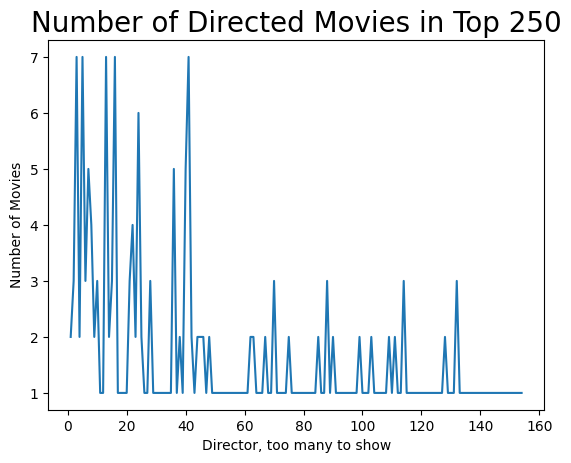

In [78]:
x = range(1, len(df7)+1)
y = df8
my_xticks = df7
plt.xticks = (x, my_xticks)
plt.plot(x, y)
plt.title('Number of Directed Movies in Top 250', fontsize =20)
plt.xlabel('Director, too many to show', fontsize = 10)
plt.ylabel('Number of Movies', fontsize = 10)
plt.show()

In [79]:
df9 = []
for movie in movies:
    actor = movie.find('td', class_="titleColumn").a
    del actor['href']
    actor1 = str(actor).split(',')[1]
    actor2 = str(actor).split(',')[2]
    actor3 = str(actor2).split('"')[0]
    df9.append([actor1])
    df9.append([actor3])
#print(df9)

In [80]:
df10 = []
for i in df9:
    if i not in df10:
        df10.append(i)
#print(df10)

In [81]:
df11 = []
for i in df10:
    print(i)
    print(df9.count(i))
    df11.append(df9.count(i))
    

[' Tim Robbins']
1
[' Morgan Freeman']
2
[' Marlon Brando']
3
[' Al Pacino']
4
[' Christian Bale']
5
[' Heath Ledger']
1
[' Robert De Niro']
9
[' Henry Fonda']
3
[' Lee J. Cobb']
1
[' Liam Neeson']
1
[' Ralph Fiennes']
2
[' Elijah Wood']
3
[' Viggo Mortensen']
2
[' John Travolta']
1
[' Uma Thurman']
2
[' Ian McKellen']
2
[' Clint Eastwood']
5
[' Eli Wallach']
1
[' Tom Hanks']
6
[' Robin Wright']
1
[' Brad Pitt']
4
[' Edward Norton']
2
[' Leonardo DiCaprio']
5
[' Joseph Gordon-Levitt']
1
[' Mark Hamill']
3
[' Harrison Ford']
6
[' Keanu Reeves']
2
[' Laurence Fishburne']
2
[' Ray Liotta']
1
[' Jack Nicholson']
3
[' Louise Fletcher']
1
[' James Stewart']
4
[' Donna Reed']
1
[' Toshirô Mifune']
4
[' Takashi Shimura']
2
[' Jodie Foster']
2
[' Anthony Hopkins']
3
[' Matt Damon']
4
[' Alexandre Rodrigues']
1
[' Leandro Firmino']
1
[' Matthew McConaughey']
1
[' Anne Hathaway']
1
[' Roberto Benigni']
1
[' Nicoletta Braschi']
1
[' Michael Clarke Duncan']
1
[' Arnold Schwarzenegger']
2
[' Linda H

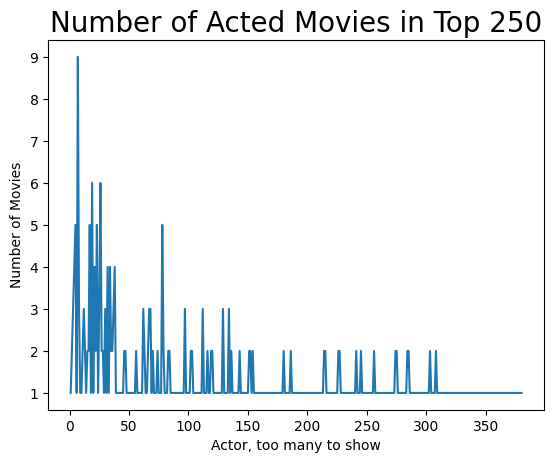

In [82]:
x = range(1, len(df10)+1)
y = df11
my_xticks = df10
plt.xticks = (x, my_xticks)
plt.plot(x, y)
plt.title('Number of Acted Movies in Top 250', fontsize =20)
plt.xlabel('Actor, too many to show', fontsize = 10)
plt.ylabel('Number of Movies', fontsize = 10)
plt.show()

In [83]:
df12 = []
for movie in movies:
    year = movie.find('td', class_="titleColumn").span

    year1 = str(year).split('>')[1]
    year2 = str(year1).split('<')[0]
    year3 = str(year2).strip('()')
    df12.append([year3])
    #print(year3)

In [84]:
df13 = sorted(df12)

In [85]:
df14 = []
for i in df13:
    if i not in df14:
        df14.append(i)
#print(df14)

In [86]:
df15 = []
for i in df14:
    print(i)
    print(df13.count(i))
    df15.append(df13.count(i))

['1921']
1
['1924']
1
['1925']
1
['1926']
1
['1927']
1
['1928']
1
['1931']
2
['1934']
1
['1936']
1
['1939']
3
['1940']
3
['1941']
1
['1942']
2
['1944']
1
['1946']
2
['1948']
2
['1949']
1
['1950']
3
['1952']
2
['1953']
2
['1954']
4
['1955']
1
['1957']
6
['1958']
1
['1959']
4
['1960']
2
['1961']
2
['1962']
3
['1963']
2
['1964']
1
['1965']
2
['1966']
3
['1967']
1
['1968']
2
['1971']
1
['1972']
1
['1973']
2
['1974']
2
['1975']
5
['1976']
3
['1977']
1
['1978']
1
['1979']
3
['1980']
4
['1981']
2
['1982']
2
['1983']
2
['1984']
3
['1985']
3
['1986']
3
['1987']
1
['1988']
4
['1989']
2
['1990']
2
['1991']
2
['1992']
3
['1993']
4
['1994']
5
['1995']
8
['1996']
2
['1997']
5
['1998']
5
['1999']
6
['2000']
5
['2001']
5
['2002']
4
['2003']
6
['2004']
7
['2005']
3
['2006']
4
['2007']
5
['2008']
3
['2009']
6
['2010']
5
['2011']
5
['2012']
3
['2013']
4
['2014']
5
['2015']
4
['2016']
4
['2017']
3
['2018']
4
['2019']
6
['2020']
2
['2021']
2
['2022']
1
['2023']
1


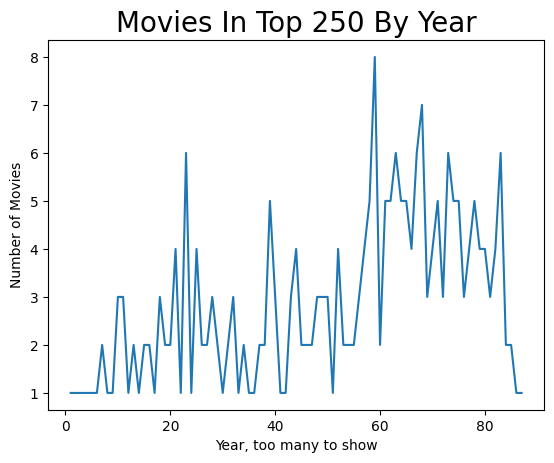

In [87]:
x = range(1, len(df14)+1)
y = df15
my_xticks = df14
plt.xticks = (x, my_xticks)
plt.plot(x, y)
plt.title('Movies In Top 250 By Year', fontsize =20)
plt.xlabel('Year, too many to show', fontsize = 10)
plt.ylabel('Number of Movies', fontsize = 10)
plt.show()